lab 6

$ git clone https://github.com/ultralytics/yolov5.git
This download YOLO in yolov5 folder.

Setting up the Python environment
$ python3 -m venv venv-yolov5
$ source venv-yolov5/bin/activate
(venv-yolov5) $ pip install -r yolov5/requirements.txt

Running YOLO on commandline
Performing inference on an image
(venv-yolov5) $ python detect.py --source data/images/bus.jpg --view

Performing inference on webcam video
(venv-yolov5) $ python detect.py --source 0
(venv-yolov5) $ python detect.py --help

In [1]:
from ultralytics import YOLO
import yaml
import os
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2
import random
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import shutil

using YOLO in jupyter notebook

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\06-object-detection-using-yolo\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 38.3ms
Speed: 2.7ms preprocess, 38.3ms inference, 144.6ms postprocess per image at shape (1, 3, 640, 480)


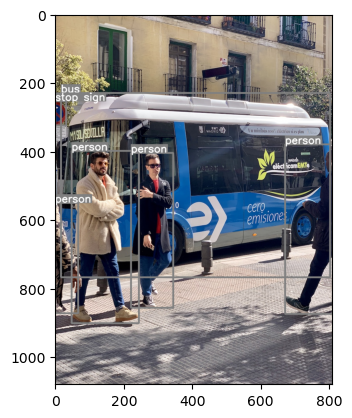

In [2]:
model = YOLO('06-object-detection-using-yolo/yolov8n.pt')
model.info()
results = model('06-object-detection-using-yolo/bus.jpg')

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

notes on COCO128 datasets

the downloaded folder has the structure:

. \
|-LICENSE \
|-README.txt \
|-images \
|-|-train2017 \
|-labels \
|-|-train2017

this folder does not contain any test images (same set of images are used for both training and testing)

images folder contains the images. labels folder contains text files, one per image, that includes annotations (ground truth)

labels text files have the format:
- 'txt'
- class-id centerx centery width height (images are resized to have height, width = 1, so dimensions are normalized)

e.g.,
- txt
- 4 0.516492 0.469388 0.912516 0.748282

YOLO requires a YAML file that describes the dataset. The coco128.yaml file has the following structure:
- path: path to the root directory for the dataset
- train: path of the directory containing the training images (relative to path)
- val: path of the directory containing validation images (relative to path)
- test: path of the directory containing test images (relative to path). optional
- names: list of class indices and their respective names
- downlaod: download link or a script. optional

e.g., 
- path: "/Users/.../coco128" 
- train: images/train2017 
- val: images/train2017 
- test: (optional)
- names:
  - 0: person
  - 1: bicycle
  - ...
- download: download-script-or-data-url (OPTIONAL)

pretrained model

it is recommended to use a pre-trained model and 'further train' it on datasets

In [2]:
model = YOLO('06-object-detection-using-yolo/yolov8n.pt') # load a pretrained model
model.info() # print model information

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

inference using pretrained model


image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\06-object-detection-using-yolo\mhw.jpg: 384x640 2 persons, 104.5ms
Speed: 4.6ms preprocess, 104.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


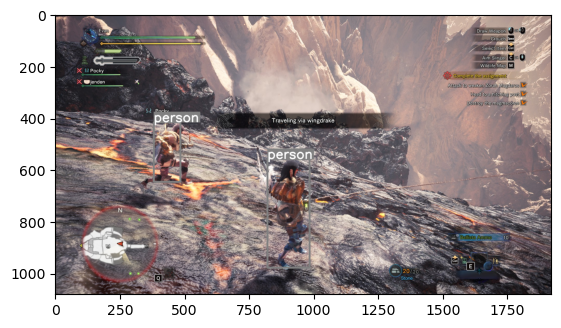

In [3]:
results = model(source = '06-object-detection-using-yolo/mhw.jpg') # inference on a single image

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes: 
    b = box.xyxy[0] # get box coordinates in (left, top, right, bottom) format
    c = box.cls # get class index
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

training model from scratch

In [4]:
model = YOLO('yolov8n.yaml') # using yolov8n structure, but randomly initialized weights
model.info()
# for name, param in model.model.named_parameters():
#     print(name, param.mean().item())  # Should show small random values close to 0

YOLOv8n summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs


(129, 3157200, 3157184, 8.8575488)

inference using a randomly intialized model

this model is not pretrained and fails to find the people in the image 


image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\06-object-detection-using-yolo\zidane.jpg: 384x640 (no detections), 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


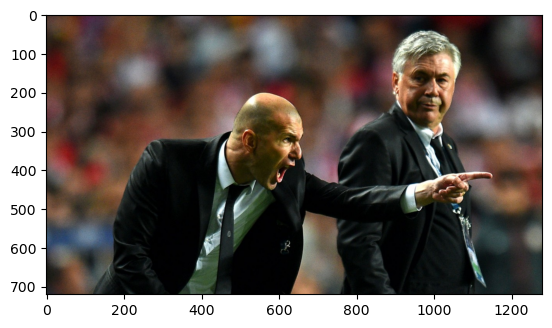

In [5]:
results = model(source = '06-object-detection-using-yolo/zidane.jpg') # inference on a single image

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0] # get box coordinates in (left, top, right, bottom) format
    c = box.cls # get class index
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

training: other considerations

Check out https://docs.ultralytics.com/modes/train/#arguments for a list of arguments for train method. Especially check out freeze argument:

Freezes the first N layers of the model or specified layers by index, reducing the number of trainable parameters. Useful for fine-tuning or transfer learning.

In [6]:
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('06-object-detection-using-yolo/yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = 'mps' # Since I am running this on Apple Silicon
epochs = 1
data = '06-object-detection-using-yolo/coco128.yaml'

# Uncomment the following to train
# This takes a while
#results = model.train(data=data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


train YOLO to detect road signs

first, need to convert road-sign-detection dataset to use YOLO annotations

e.g., need to convert road0.xml to be same structure in the txt files. Also need to create the yaml file

constructing YOLO data pipeline from road-sign-detection dataset

the following coded takes an sml file and outputs annotations found within as YOLO format. This will create txt files, one per image, to store the annotations

In [ ]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, rootpath='.', write_to_file=False):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    if write_to_file:
        # Name of the file which we have to save 
        save_file_name = os.path.join(rootpath, "annotations", info_dict["filename"].replace("png", "txt"))
    
        # Save the annotation to disk
        print("\n".join(print_buffer), file= open(save_file_name, "w"))
    else:
        return print_buffer

In [33]:
# testing functions with one file
xml_file = '06-object-detection-using-yolo/road0.xml'
xml_info = extract_info_from_xml(xml_file)
print('xml_info:\n', xml_info)

yolo_annotations = convert_to_yolov5(xml_info)
print('yolo_annotations:\n', yolo_annotations)

xml_info:
 {'bboxes': [{'class': 'trafficlight', 'xmin': 98, 'ymin': 62, 'xmax': 208, 'ymax': 232}], 'filename': 'road0.png', 'image_size': (267, 400, 3)}
yolo_annotations:
 ['0 0.573 0.367 0.412 0.425']


In [ ]:
# Convert all the road sign XML files to YOLO format

# Rootpath indicates the root folder where you have stored the road-sign-detection dataset
rootpath = "road-sign-detection"

annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "xml"]
annotations.sort()

for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, rootpath=rootpath, write_to_file=True)
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

0it [00:00, ?it/s]


split data into train, validation, and test sets

following code will construct 6 lists:
- train_images
- train_annotations
- val_images
- val_annotations
- test_images
- test_annotations

each list contains filenames

In [ ]:
images = [os.path.join(rootpath, 'images', x) for x in os.listdir(os.path.join(rootpath, 'images'))]
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

moving/copying images to their respective folders

layout:
. \
|-images \
||-test \
||-train \
||-val \
|-labels \
||-test \
||-train \
||-val

In [ ]:
x = 0
train_images.sort()
for f in train_images:
    print(f)  # This should print full paths like "road-sign-detection/images/road0.png"
    x = x  + 1
    if x > 5:
        break

road-sign-detection\images\road0.png
road-sign-detection\images\road1.png
road-sign-detection\images\road101.png
road-sign-detection\images\road102.png
road-sign-detection\images\road103.png
road-sign-detection\images\road104.png


In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
        
    for f in list_of_files:
        if not os.path.exists(f):
            print(f"File not found: {f}")  # Debugging print
            # continue  # Skip missing files
            break  # Stop execution if a file is missing
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [14]:
# Move training images and labels
move_files_to_folder(train_images, "road-sign-detection/images/train")
move_files_to_folder(train_annotations, "road-sign-detection/labels/train")

# Move validation images and labels
move_files_to_folder(val_images, "road-sign-detection/images/val")
move_files_to_folder(val_annotations, "road-sign-detection/labels/val")

# Move test images and labels
move_files_to_folder(test_images, "road-sign-detection/images/test")
move_files_to_folder(test_annotations, "road-sign-detection/labels/test")

In [18]:
# Load the dataset using the new folder structure
train_images1 = [os.path.join("road-sign-detection/images/train", x) for x in os.listdir("road-sign-detection/images/train")]
train_labels1 = [os.path.join("road-sign-detection/labels/train", x) for x in os.listdir("road-sign-detection/labels/train")]

val_images1 = [os.path.join("road-sign-detection/images/val", x) for x in os.listdir("road-sign-detection/images/val")]
val_labels1 = [os.path.join("road-sign-detection/labels/val", x) for x in os.listdir("road-sign-detection/labels/val")]

test_images1 = [os.path.join("road-sign-detection/images/test", x) for x in os.listdir("road-sign-detection/images/test")]
test_labels1 = [os.path.join("road-sign-detection/labels/test", x) for x in os.listdir("road-sign-detection/labels/test")]

In [ ]:
# checking if results (files) are same as when they were in 
# 'train_images' when 'images' got split
x = 0

for f in train_images1:
    print(f)  
    x = x  + 1
    if x > 5:
        break

road-sign-detection/images/train\road0.png
road-sign-detection/images/train\road1.png
road-sign-detection/images/train\road101.png
road-sign-detection/images/train\road102.png
road-sign-detection/images/train\road103.png
road-sign-detection/images/train\road104.png


created yaml file:

path: C:/Users/.../road-sign-detection

train: images/train/

val: images/val/

test: images/test/

nc: 4

names: ["trafficlight", "stop", "speedlimit", "crosswalk"]


In [ ]:
# testing yaml file

yaml_path = "road-sign-detection/road-sign-detection.yaml"

with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

dataset_path = data['path']
train_images_path = os.path.join(dataset_path, data['train'])
val_images_path = os.path.join(dataset_path, data['val'])
test_images_path = os.path.join(dataset_path, data['test'])

# print(f"Dataset path: {dataset_path}")
# print(f"Train images path: {train_images_path}")
# print(f"Validation images path: {val_images_path}")
# print(f"Test images path: {test_images_path}")

model1 = YOLO('yolov8n.yaml') 
model1.overrides["data"] = yaml_path

model1.data = yaml_path
# model1.info()

In [5]:
# note: use Tiny YOLO for these experiments.
# 1. Construct a pretrained YOLO and capture its performance on the test set without 
# any training.

yaml_path = "road-sign-detection/road-sign-detection.yaml"

# load the pretrained model (n = nano)
task1_model = YOLO('06-object-detection-using-yolo/yolov8n.pt')

# perform inference on the test set
results = task1_model.val(split = "test", data = yaml_path)

Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\test... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 671.15it/s]

val: New cache created: C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]


                   all         88        126   0.000229     0.0125   0.000125    2.5e-05
                person         12         20   0.000916       0.05   0.000499   9.99e-05
               bicycle          7          7          0          0          0          0
                   car         67         76          0          0          0          0
            motorcycle         20         23          0          0          0          0
Speed: 2.0ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\val


In [6]:
# 2. Construct a pretrained YOLO. Train it for 5 epochs on the training set. Then 
# capture its performance on the test set.

yaml_path = "road-sign-detection/road-sign-detection.yaml"

# load the pretrained model
task2_model = YOLO('06-object-detection-using-yolo/yolov8n.pt')

# train the model for 5 epochs
train_results = task2_model.train(data = yaml_path, epochs = 5)

# perform inference on the test set
results = task2_model.val(split = "test", data = yaml_path)

New https://pypi.org/project/ultralytics/8.3.91 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
engine\trainer: task=detect, mode=train, model=06-object-detection-using-yolo/yolov8n.pt, data=road-sign-detection/road-sign-detection.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

100%|██████████| 5.35M/5.35M [00:00<00:00, 6.10MB/s]


AMP: checks passed 


train: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\train... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<00:00, 870.02it/s]


train: New cache created: C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\train.cache


val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\val... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 915.84it/s]

val: New cache created: C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\val.cache


Plotting labels to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.99G     0.7775      2.544     0.9327         32        640: 100%|██████████| 44/44 [00:09<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         88        132      0.983      0.194      0.541      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.28G     0.7954      1.493     0.9319         50        640: 100%|██████████| 44/44 [00:03<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         88        132      0.806      0.577      0.795      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       2.3G     0.7567      1.267     0.9371         26        640: 100%|██████████| 44/44 [00:03<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all         88        132      0.939      0.792      0.865      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.31G     0.7017      1.082     0.9153         37        640: 100%|██████████| 44/44 [00:03<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all         88        132      0.956      0.806      0.877      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.33G     0.6359      0.995     0.8976         27        640: 100%|██████████| 44/44 [00:03<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         88        132      0.941      0.872      0.922      0.761



5 epochs completed in 0.007 hours.
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train\weights\best.pt, 6.2MB

Validating C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train\weights\best.pt...
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]


                   all         88        132      0.941      0.872      0.922      0.759
          trafficlight         10         19      0.801      0.684      0.784      0.546
                  stop         10         10      0.974        0.9      0.948       0.87
            speedlimit         69         81      0.987      0.975      0.994      0.851
             crosswalk         16         22          1      0.928      0.962      0.769
Speed: 0.5ms preprocess, 1.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\test.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


                   all         88        126        0.9      0.864      0.874      0.714
          trafficlight         12         20      0.721        0.6      0.577      0.379
                  stop          7          7      0.985          1      0.995      0.832
            speedlimit         67         76      0.971      0.987      0.995      0.862
             crosswalk         20         23      0.925       0.87      0.931      0.782
Speed: 1.6ms preprocess, 4.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train2


In [3]:
# 3. Train a YOLO from scratch for 5 and 15 epochs on the training set. Then capture 
# its performance on the test set.

yaml_path = "road-sign-detection/road-sign-detection.yaml"

# load the scratch models
task3_model = YOLO('yolov8n.yaml')

# train the model for 5 epochs and 15 epochs
task3_model.train(data = yaml_path, epochs = 5)

# perform inference on the test set
results = task3_model.val(split = "test", data = yaml_path)

New https://pypi.org/project/ultralytics/8.3.91 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=road-sign-detection/road-sign-detection.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\train.cache... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<?, ?it/s]
val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]


Plotting labels to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.01G      3.539      5.453      4.342         32        640: 100%|██████████| 44/44 [00:07<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         88        132   0.000264     0.0724   0.000174   4.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.48G      3.363      4.746      3.868         50        640: 100%|██████████| 44/44 [00:03<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]

                   all         88        132    0.00022     0.0693   0.000268   9.95e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       2.5G      2.998      4.303      3.419         26        640: 100%|██████████| 44/44 [00:03<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


                   all         88        132   0.000689      0.169      0.035      0.013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5       2.5G      2.615      3.629      2.985         37        640: 100%|██████████| 44/44 [00:03<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         88        132       0.73      0.158      0.171     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.52G       2.35      3.254      2.706         27        640: 100%|██████████| 44/44 [00:03<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]

                   all         88        132      0.768      0.207      0.235      0.154



5 epochs completed in 0.007 hours.
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\best.pt, 6.2MB

Validating C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\best.pt...
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         88        132      0.768      0.206      0.235      0.154
          trafficlight         10         19          1          0    0.00682   0.000846
                  stop         10         10      0.519      0.219      0.288      0.196
            speedlimit         69         81      0.551      0.605      0.601      0.403
             crosswalk         16         22          1          0     0.0463     0.0155
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\test.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]


                   all         88        126      0.711      0.242      0.267      0.153
          trafficlight         12         20          1          0    0.00118   0.000149
                  stop          7          7      0.164      0.286      0.245     0.0948
            speedlimit         67         76      0.679      0.684      0.743      0.467
             crosswalk         20         23          1          0     0.0799     0.0509
Speed: 2.6ms preprocess, 6.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train42


In [4]:
# same as above but for 15 epochs
task3_model = YOLO('yolov8n.yaml')
task3_model.train(data = yaml_path, epochs = 15)
results = task3_model.val(split = "test", data = yaml_path)

New https://pypi.org/project/ultralytics/8.3.91 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=road-sign-detection/road-sign-detection.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\train.cache... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:00<?, ?it/s]
val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\val.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]


Plotting labels to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.02G      3.539      5.453      4.342         32        640: 100%|██████████| 44/44 [00:05<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]

                   all         88        132   0.000264     0.0724   0.000174   4.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.29G      3.349      4.735      3.837         50        640: 100%|██████████| 44/44 [00:03<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]

                   all         88        132   0.000225     0.0693   0.000173   4.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.29G      2.878      4.127       3.28         26        640: 100%|██████████| 44/44 [00:03<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         88        132      0.794     0.0154     0.0169    0.00438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.29G      2.466      3.349      2.799         37        640: 100%|██████████| 44/44 [00:03<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]

                   all         88        132       0.92      0.111      0.144     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.31G      2.038      2.713      2.406         27        640: 100%|██████████| 44/44 [00:03<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]

                   all         88        132      0.609      0.253      0.287      0.177


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.33G       1.53      2.496       2.03         18        640: 100%|██████████| 44/44 [00:04<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]

                   all         88        132      0.547      0.343      0.301      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.35G      1.371      2.091      1.855         19        640: 100%|██████████| 44/44 [00:03<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         88        132      0.636      0.358       0.35      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.35G      1.262      1.785      1.724         16        640: 100%|██████████| 44/44 [00:03<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]

                   all         88        132      0.889      0.444      0.557      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.35G      1.153      1.556      1.627         16        640: 100%|██████████| 44/44 [00:03<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]

                   all         88        132      0.596      0.487      0.545      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.35G      1.142      1.459      1.595         16        640: 100%|██████████| 44/44 [00:03<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]

                   all         88        132      0.763      0.475      0.478      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.35G      1.095      1.383       1.54         25        640: 100%|██████████| 44/44 [00:03<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.10it/s]

                   all         88        132      0.614      0.608      0.622      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.35G      1.088      1.283      1.512         17        640: 100%|██████████| 44/44 [00:03<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all         88        132      0.648      0.601       0.63      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.36G      1.014      1.165      1.441         21        640: 100%|██████████| 44/44 [00:03<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]

                   all         88        132       0.89      0.546       0.62      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.36G      0.969      1.124      1.406         15        640: 100%|██████████| 44/44 [00:03<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all         88        132      0.836      0.615       0.66      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.36G      0.935      1.068      1.383         16        640: 100%|██████████| 44/44 [00:03<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]

                   all         88        132      0.676      0.651       0.67      0.501



15 epochs completed in 0.027 hours.
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\best.pt, 6.2MB

Validating C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4\weights\best.pt...
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         88        132      0.676      0.651       0.67        0.5
          trafficlight         10         19      0.297      0.105      0.109     0.0355
                  stop         10         10      0.822        0.9      0.896      0.688
            speedlimit         69         81      0.902      0.963      0.971      0.799
             crosswalk         16         22      0.685      0.636      0.703      0.479
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train4
Ultralytics 8.3.88  Python-3.12.7 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLOv8n summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\labels\test.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


                   all         88        126      0.939      0.664      0.687      0.528
          trafficlight         12         20          1          0     0.0422     0.0127
                  stop          7          7      0.861          1       0.96      0.639
            speedlimit         67         76      0.954      0.961      0.986      0.847
             crosswalk         20         23      0.942      0.696       0.76      0.614
Speed: 1.6ms preprocess, 2.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\runs\detect\train42


4 Construct a table that compares the performance obtained under various settings

YOLOv8n (pretrained, no road sign training)
- P: 0.000229
- R: 0.0125
- mAP50: 0.000125
- mAP50-95: 2.5e-05
- (note: because there was no training, model used wrong labels too)

YOLOv8n (pretrained, road sign training, epochs = 5)
- P: 0.9
- R: 0.864
- mAP50: 0.874
- mAP50-95: 0.714
- (note: best performance out of the 4 settings)

YOLOv8n (sratch, road sign training, epochs = 5)
- P: 0.711
- R: 0.242
- mAP50: 0.267
- mAP50-95: 0.153

YOLOv8n (sratch, road sign training, epochs = 15)
- P: 0.939
- R: 0.664
- mAP50: 0.687
- mAP50-95: 0.528
- (note: better performance with more training)


image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\images\test\road3.png: 480x640 1 traffic light, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\images\test\road142.png: 640x448 (no detections), 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\images\test\road356.png: 640x480 1 stop sign, 1 clock, 5.5ms
Speed: 1.1ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\endle\.Uni\Computer_Vision\lab6\computer-vision-lab6\road-sign-detection\images\test\road640.png: 640x480 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Use

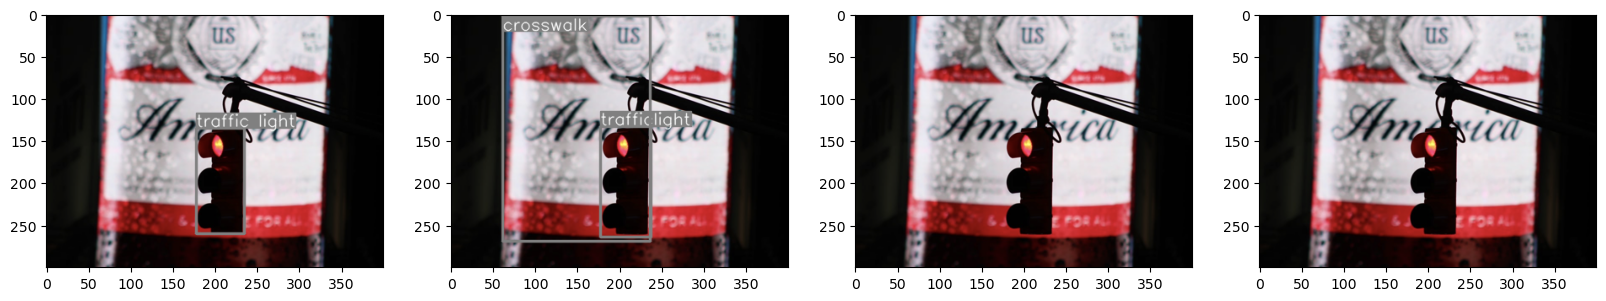

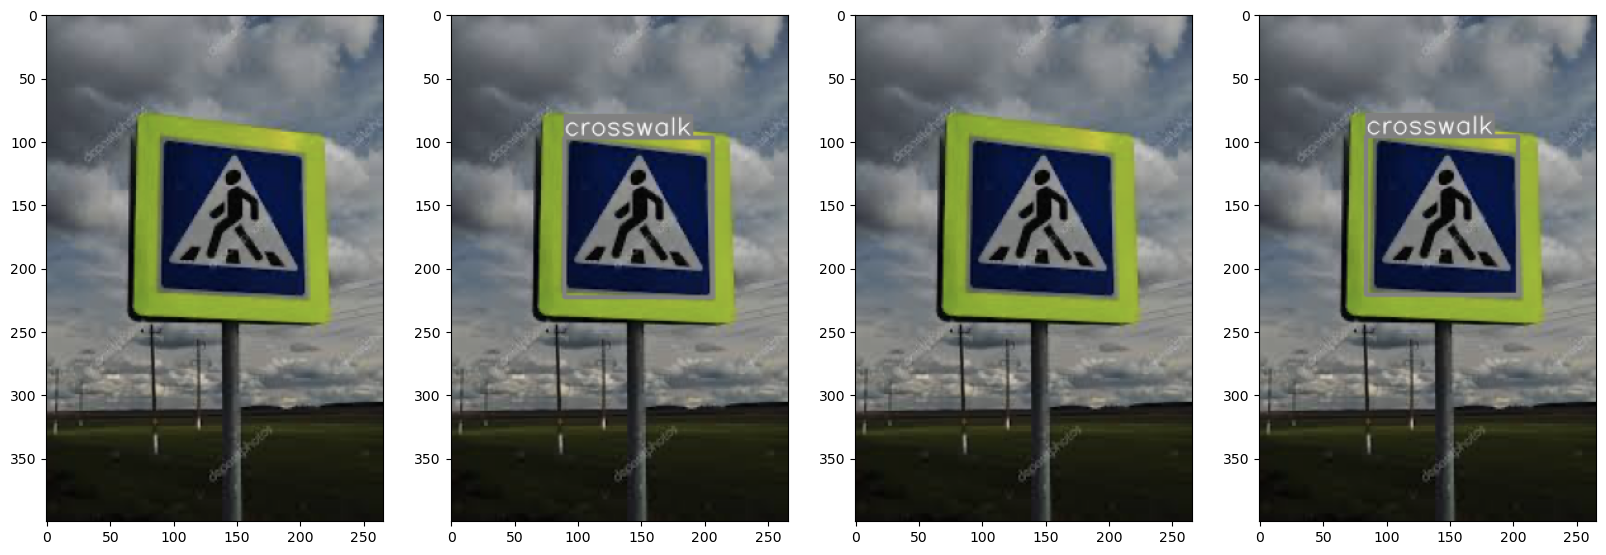

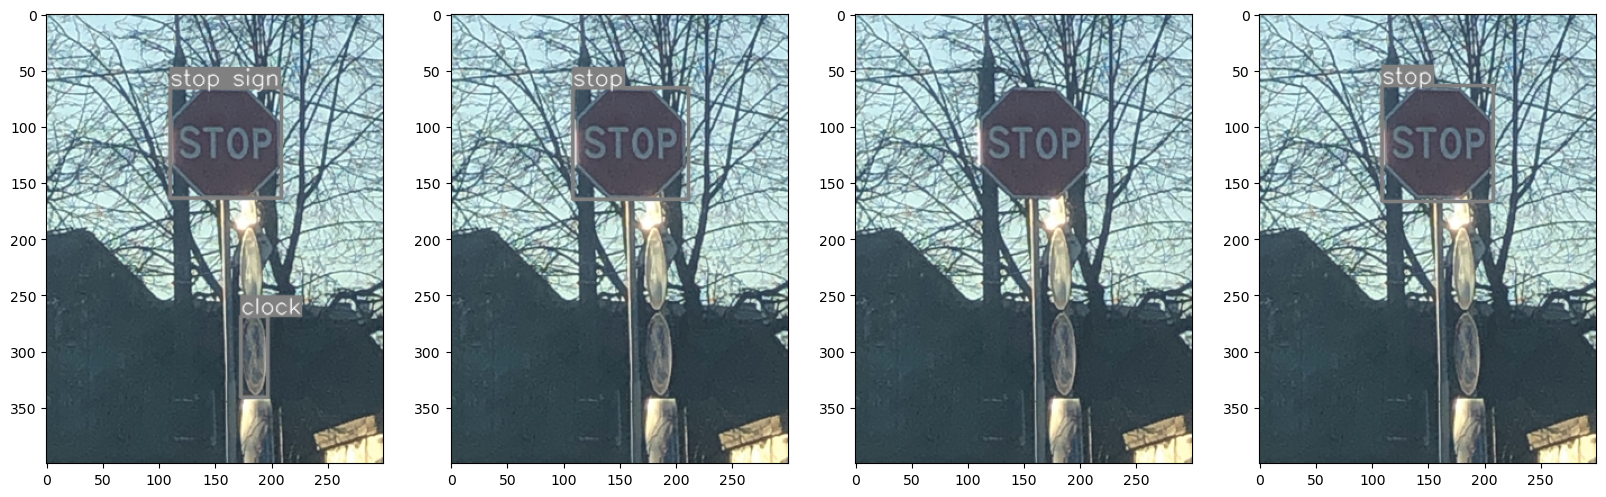

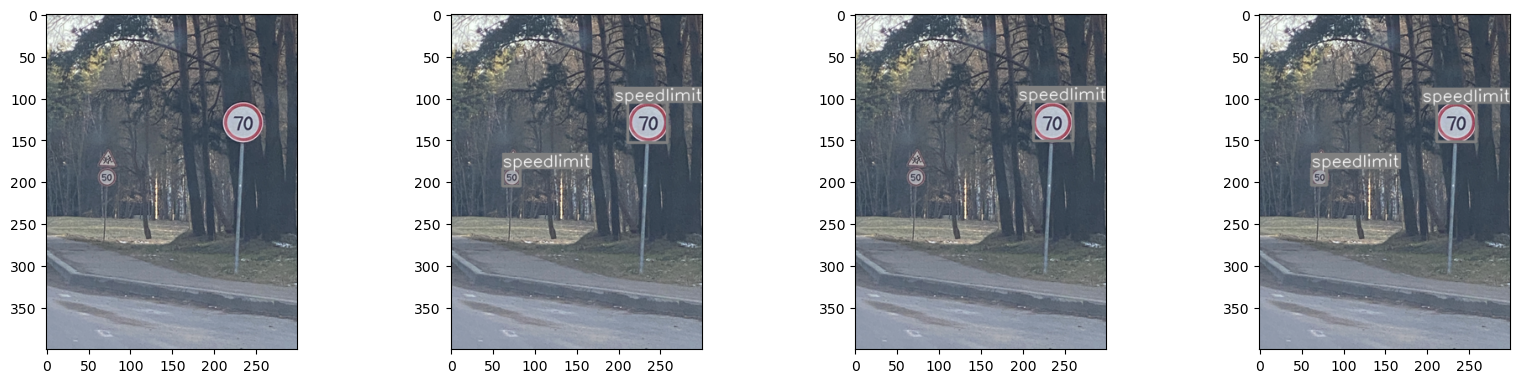

In [18]:
# 5. Pick a small subset of test images and show qualitative results under various 
# settings.

# load the different models
model1 = YOLO('06-object-detection-using-yolo/yolov8n.pt')
model2 = YOLO('runs/detect/train/weights/best.pt')
model3 = YOLO('runs/detect/train3/weights/best.pt')
model4 = YOLO('runs/detect/train4/weights/best.pt')

# some test images for each class
test_image1 = 'road-sign-detection/images/test/road3.png'
test_image2 = 'road-sign-detection/images/test/road142.png'
test_image3 = 'road-sign-detection/images/test/road356.png'
test_image4 = 'road-sign-detection/images/test/road640.png'

# run inference
# i got lazy and just copy pasted
results1 = model1(test_image1)
results12 = model1(test_image2)
results13 = model1(test_image3)
results14 = model1(test_image4)
results2 = model2(test_image1)
results22 = model2(test_image2)
results23 = model2(test_image3)
results24 = model2(test_image4)
results3 = model3(test_image1)
results32 = model3(test_image2)
results33 = model3(test_image3)
results34 = model3(test_image4)
results4 = model4(test_image1)
results42 = model4(test_image2)
results43 = model4(test_image3)
results44 = model4(test_image4)

# plot the results
def plot_result(result, model):
    annotator = Annotator(cv2.cvtColor(result[0].orig_img, cv2.COLOR_BGR2RGB))
    boxes = result[0].boxes
    for box in boxes:
        b = box.xyxy[0] # get box coordinates in (left, top, right, bottom) format
        c = box.cls # get class index
        annotator.box_label(b, model.names[int(c)])
    plt.imshow(annotator.result())

# again, got lazy...
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plot_result(results1, model1)
plt.subplot(1, 4, 2)
plot_result(results2, model2)
plt.subplot(1, 4, 3)
plot_result(results3, model3)
plt.subplot(1, 4, 4)
plot_result(results4, model4)

plt.figure(figsize=(20, 20))
plt.subplot(2, 4, 1)
plot_result(results12, model1)
plt.subplot(2, 4, 2)
plot_result(results22, model2)
plt.subplot(2, 4, 3)
plot_result(results32, model3)
plt.subplot(2, 4, 4)
plot_result(results42, model4)

plt.figure(figsize=(20, 20))
plt.subplot(3, 4, 1)
plot_result(results13, model1)
plt.subplot(3, 4, 2)
plot_result(results23, model2)
plt.subplot(3, 4, 3)
plot_result(results33, model3)
plt.subplot(3, 4, 4)
plot_result(results43, model4)

plt.figure(figsize=(20, 20))
plt.subplot(4, 4, 1)
plot_result(results14, model1)
plt.subplot(4, 4, 2)
plot_result(results24, model2)
plt.subplot(4, 4, 3)
plot_result(results34, model3)
plt.subplot(4, 4, 4)
plot_result(results44, model4)
